In [1]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  Copyright 2021-  QuOCS Team
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [2]:
import matplotlib.pyplot as plt
import os

# Parameter Optimization

### Define the Model
We use the Rosenbrock provided by numpy. It is wrapped in a class named RosenFoM which is a child of the AbstractFoM class provided by QuOCS. The class should contain a function called get_FoM() which takes the pulses, parameters and timegrids as lists on numpy arrays.

In [3]:
import numpy as np
from scipy.optimize import rosen

from quocslib.utils.AbstractFoM import AbstractFoM


class RosenFoM(AbstractFoM):

    def __init__(self, args_dict: dict = None):
        if args_dict is None:
            args_dict = {}

    def get_FoM(self, pulses: list = [], parameters: list = [], timegrids: list = []) -> dict:
        """
        Function to calculate the figure of merit from the pulses and parameters and timegrids.
        Here, only the parameters are used and passed to the rosen function.
        :param list pulses: List of np.arrays. One np.array for each pulse.
        :param list timegrids: List of np.arrays. One np.array for each time grid.
        :param list parameters: List of floats. One float ofr each parameter.
        :return: dict - The figure of merit in a dictionary
        """
        FoM = rosen(np.asarray(parameters))
        return {"FoM": FoM}


### Define the configuration dictionary
This dictionary is passed to the QuOCS optimized in order to tell it what optimization algorithm to use. I also contains further settings for the optimization process.

First, we give the optimization a name, which will also appear in the name of the results folder generated.

In [4]:
optimization_dictionary = {"optimization_client_name": "IsingModeldCRAB"}

The "algotithm_settings" key in gets a dictionary with the name of the algorithm. In this case a direct search (for the parameters).

In [5]:
optimization_dictionary["algorithm_settings"] = {"algorithm_name": "DirectSearch"}

We then define the direct search alsgorithm to be Nelder-Mead and specify some stopping criteria.

In [6]:
dsm_settings = {
        "general_settings": {
            "dsm_algorithm_name": "NelderMead",
            "is_adaptive": False
        },
        "stopping_criteria": {
            "xatol": 1e-5,
            "fatol": 1e-12
        }
    }

And then add the dsm_settings dictionary to the "algorithm_settings" part of the optimization_dictionary.

In [7]:
optimization_dictionary["algorithm_settings"]["dsm_settings"] = dsm_settings

The controls are defined as parameters with limits, initial value and an initial variation.

In [8]:
total_number_of_parameters = 10
parameters = []
for index in range(total_number_of_parameters):
    parameters.append({"parameter_name": "Parameter{0}".format(index),
                       "lower_limit": -2.0,
                       "upper_limit": 2.0,
                       "initial_value": 0.4,
                       "amplitude_variation": 0.5})

Insert the controls in the optimization dictionary

In [9]:
optimization_dictionary["pulses"] = []
optimization_dictionary["parameters"] = parameters
optimization_dictionary["times"] = []

### Create the optimizer and run the optimization

In [10]:
from quocslib.Optimizer import Optimizer
import time

# Define Optimizer
optimization_obj = Optimizer(optimization_dictionary, RosenFoM())

INFO     oc_logger    The optimization direction is minimization


Run the optimization and track the time needed:

In [11]:
time1 = time.time()
optimization_obj.execute()
time2 = time.time()
print("The optimization took {seconds} seconds".format(seconds=time2 - time1))

INFO     oc_logger    QuOCS version number: 0.0.47
INFO     oc_logger    Function evaluation number: 1, FoM: 55.08
INFO     oc_logger    Function evaluation number: 2, FoM: 90.77089380933032
INFO     oc_logger    Function evaluation number: 3, FoM: 85.02382014372681
INFO     oc_logger    Function evaluation number: 4, FoM: 104.53398755163097
INFO     oc_logger    Function evaluation number: 5, FoM: 116.83948881135463
INFO     oc_logger    Function evaluation number: 6, FoM: 77.82782473687251
INFO     oc_logger    Function evaluation number: 7, FoM: 87.60185756084769
INFO     oc_logger    Function evaluation number: 8, FoM: 91.5902347357236
INFO     oc_logger    Function evaluation number: 9, FoM: 117.58348001076442
INFO     oc_logger    Function evaluation number: 10, FoM: 94.50124551914655
INFO     oc_logger    Function evaluation number: 11, FoM: 93.78204021996758
INFO     oc_logger    Function evaluation number: 12, FoM: 125.40058211963898
INFO     oc_logger    Function evaluation n

INFO     oc_logger    Function evaluation number: 107, FoM: 16.865509146957443
INFO     oc_logger    Function evaluation number: 108, FoM: 21.088355821005166
INFO     oc_logger    Function evaluation number: 109, FoM: 19.53835577501621
INFO     oc_logger    Function evaluation number: 110, FoM: 23.754915563335402
INFO     oc_logger    Function evaluation number: 111, FoM: 14.342479354285599
INFO     oc_logger    Function evaluation number: 112, FoM: 10.185719981811774
INFO     oc_logger    Function evaluation number: 113, FoM: 21.92591148416122
INFO     oc_logger    Function evaluation number: 114, FoM: 20.06140339173398
INFO     oc_logger    Function evaluation number: 115, FoM: 19.080366473003323
INFO     oc_logger    Function evaluation number: 116, FoM: 17.49263612073168
INFO     oc_logger    Function evaluation number: 117, FoM: 17.289249771443668
INFO     oc_logger    Function evaluation number: 118, FoM: 23.138694997154367
INFO     oc_logger    Function evaluation number: 119, F

INFO     oc_logger    Function evaluation number: 212, FoM: 4.5497115113060005
INFO     oc_logger    Function evaluation number: 213, FoM: 4.477629731376769
INFO     oc_logger    Function evaluation number: 214, FoM: 4.788796309589852
INFO     oc_logger    Function evaluation number: 215, FoM: 4.788275782784784
INFO     oc_logger    Function evaluation number: 216, FoM: 4.4760701012338835
INFO     oc_logger    Function evaluation number: 217, FoM: 4.493912851730936
INFO     oc_logger    Function evaluation number: 218, FoM: 4.5987879518590535
INFO     oc_logger    Function evaluation number: 219, FoM: 4.459001502381415
INFO     oc_logger    Function evaluation number: 220, FoM: 4.365389940460085
INFO     oc_logger    Function evaluation number: 221, FoM: 4.443116014825485
INFO     oc_logger    Function evaluation number: 222, FoM: 4.421791488309793
INFO     oc_logger    Function evaluation number: 223, FoM: 4.891810695262154
INFO     oc_logger    Function evaluation number: 224, FoM: 4

INFO     oc_logger    Function evaluation number: 317, FoM: 4.141523172396156
INFO     oc_logger    Function evaluation number: 318, FoM: 4.160702743213566
INFO     oc_logger    Function evaluation number: 319, FoM: 4.152962487792886
INFO     oc_logger    Function evaluation number: 320, FoM: 4.179245268662246
INFO     oc_logger    Function evaluation number: 321, FoM: 4.132894738236413
INFO     oc_logger    Function evaluation number: 322, FoM: 4.1253671798937495
INFO     oc_logger    Function evaluation number: 323, FoM: 4.154273019755338
INFO     oc_logger    Function evaluation number: 324, FoM: 4.1331306576356415
INFO     oc_logger    Function evaluation number: 325, FoM: 4.141337561954224
INFO     oc_logger    Function evaluation number: 326, FoM: 4.107008104962126
INFO     oc_logger    Function evaluation number: 327, FoM: 4.103260365402786
INFO     oc_logger    Function evaluation number: 328, FoM: 4.10933885768924
INFO     oc_logger    Function evaluation number: 329, FoM: 4.1

INFO     oc_logger    Function evaluation number: 423, FoM: 4.022481152986645
INFO     oc_logger    Function evaluation number: 424, FoM: 4.023466237676833
INFO     oc_logger    Function evaluation number: 425, FoM: 4.019733909373546
INFO     oc_logger    Function evaluation number: 426, FoM: 4.023978336632544
INFO     oc_logger    Function evaluation number: 427, FoM: 4.0196649336713755
INFO     oc_logger    Function evaluation number: 428, FoM: 4.019963982956817
INFO     oc_logger    Function evaluation number: 429, FoM: 4.016928533001243
INFO     oc_logger    Function evaluation number: 430, FoM: 4.017514433911
INFO     oc_logger    Function evaluation number: 431, FoM: 4.02191632500976
INFO     oc_logger    Function evaluation number: 432, FoM: 4.019147410213258
INFO     oc_logger    Function evaluation number: 433, FoM: 4.0218014951687096
INFO     oc_logger    Function evaluation number: 434, FoM: 4.01908581663292
INFO     oc_logger    Function evaluation number: 435, FoM: 4.01934

INFO     oc_logger    Function evaluation number: 529, FoM: 4.010068984677192
INFO     oc_logger    Function evaluation number: 530, FoM: 4.00904248791068
INFO     oc_logger    Function evaluation number: 531, FoM: 4.009311555480015
INFO     oc_logger    Function evaluation number: 532, FoM: 4.0100387461169555
INFO     oc_logger    Function evaluation number: 533, FoM: 4.009835898491406
INFO     oc_logger    Function evaluation number: 534, FoM: 4.0091054400549115
INFO     oc_logger    Function evaluation number: 535, FoM: 4.008389476523233
INFO     oc_logger    Function evaluation number: 536, FoM: 4.009131924302098
INFO     oc_logger    Function evaluation number: 537, FoM: 4.00799229592666
INFO     oc_logger    Function evaluation number: 538, FoM: 4.008166066455524
INFO     oc_logger    Function evaluation number: 539, FoM: 4.00726239762081
INFO     oc_logger    Function evaluation number: 540, FoM: 4.006663057242627
INFO     oc_logger    Function evaluation number: 541, FoM: 4.007

INFO     oc_logger    Function evaluation number: 634, FoM: 3.9384440153810596
INFO     oc_logger    Function evaluation number: 635, FoM: 3.9373895840619424
INFO     oc_logger    Function evaluation number: 636, FoM: 3.9343281993937067
INFO     oc_logger    Function evaluation number: 637, FoM: 3.9433342462451577
INFO     oc_logger    Function evaluation number: 638, FoM: 3.9384265537120813
INFO     oc_logger    Function evaluation number: 639, FoM: 3.9391426589856438
INFO     oc_logger    Function evaluation number: 640, FoM: 3.92950692711253
INFO     oc_logger    Function evaluation number: 641, FoM: 3.9346271484104434
INFO     oc_logger    Function evaluation number: 642, FoM: 3.9358842145969484
INFO     oc_logger    Function evaluation number: 643, FoM: 3.9299761932250816
INFO     oc_logger    Function evaluation number: 644, FoM: 3.925434313785913
INFO     oc_logger    Function evaluation number: 645, FoM: 3.9282150114044785
INFO     oc_logger    Function evaluation number: 646, 

INFO     oc_logger    Function evaluation number: 739, FoM: 3.62266429577774
INFO     oc_logger    Function evaluation number: 740, FoM: 3.581762076252461
INFO     oc_logger    Function evaluation number: 741, FoM: 3.57269658072986
INFO     oc_logger    Function evaluation number: 742, FoM: 3.66744722519277
INFO     oc_logger    Function evaluation number: 743, FoM: 3.628977326726209
INFO     oc_logger    Function evaluation number: 744, FoM: 3.6004770587976944
INFO     oc_logger    Function evaluation number: 745, FoM: 3.578959108735581
INFO     oc_logger    Function evaluation number: 746, FoM: 3.5636296283395517
INFO     oc_logger    Function evaluation number: 747, FoM: 3.6168592051407664
INFO     oc_logger    Function evaluation number: 748, FoM: 3.5602251217101104
INFO     oc_logger    Function evaluation number: 749, FoM: 3.6226363192801676
INFO     oc_logger    Function evaluation number: 750, FoM: 3.5671217466925613
INFO     oc_logger    Function evaluation number: 751, FoM: 3

INFO     oc_logger    Function evaluation number: 844, FoM: 3.200131421740364
INFO     oc_logger    Function evaluation number: 845, FoM: 3.182588161929586
INFO     oc_logger    Function evaluation number: 846, FoM: 3.194922964187836
INFO     oc_logger    Function evaluation number: 847, FoM: 3.2000830948269727
INFO     oc_logger    Function evaluation number: 848, FoM: 3.1629857082211448
INFO     oc_logger    Function evaluation number: 849, FoM: 3.1982006580509617
INFO     oc_logger    Function evaluation number: 850, FoM: 3.1978113795854215
INFO     oc_logger    Function evaluation number: 851, FoM: 3.1749149335565936
INFO     oc_logger    Function evaluation number: 852, FoM: 3.1496648907599374
INFO     oc_logger    Function evaluation number: 853, FoM: 3.1726125968065846
INFO     oc_logger    Function evaluation number: 854, FoM: 3.1713942684568277
INFO     oc_logger    Function evaluation number: 855, FoM: 3.1856202581469564
INFO     oc_logger    Function evaluation number: 856, 

INFO     oc_logger    Function evaluation number: 949, FoM: 3.0334532684420643
INFO     oc_logger    Function evaluation number: 950, FoM: 3.0195820989943782
INFO     oc_logger    Function evaluation number: 951, FoM: 3.024698130233138
INFO     oc_logger    Function evaluation number: 952, FoM: 3.0465285862364975
INFO     oc_logger    Function evaluation number: 953, FoM: 3.029995648356388
INFO     oc_logger    Function evaluation number: 954, FoM: 3.0353263562544894
INFO     oc_logger    Function evaluation number: 955, FoM: 3.02413017715429
INFO     oc_logger    Function evaluation number: 956, FoM: 3.036528930379343
INFO     oc_logger    Function evaluation number: 957, FoM: 3.0196272178947132
INFO     oc_logger    Function evaluation number: 958, FoM: 3.037072260945937
INFO     oc_logger    Function evaluation number: 959, FoM: 3.0251319853698706
INFO     oc_logger    Function evaluation number: 960, FoM: 3.0297750440285025
INFO     oc_logger    Function evaluation number: 961, FoM

INFO     oc_logger    Function evaluation number: 1053, FoM: 2.89121253385684
INFO     oc_logger    Function evaluation number: 1054, FoM: 2.879526925761137
INFO     oc_logger    Function evaluation number: 1055, FoM: 2.885151461077551
INFO     oc_logger    Function evaluation number: 1056, FoM: 2.890440902106739
INFO     oc_logger    Function evaluation number: 1057, FoM: 2.882178522834894
INFO     oc_logger    Function evaluation number: 1058, FoM: 2.864892160081183
INFO     oc_logger    Function evaluation number: 1059, FoM: 2.8545433471420556
INFO     oc_logger    Function evaluation number: 1060, FoM: 2.8598777626165197
INFO     oc_logger    Function evaluation number: 1061, FoM: 2.880182523606482
INFO     oc_logger    Function evaluation number: 1062, FoM: 2.8390329232837495
INFO     oc_logger    Function evaluation number: 1063, FoM: 2.8231418722914756
INFO     oc_logger    Function evaluation number: 1064, FoM: 2.8433805023296617
INFO     oc_logger    Function evaluation number

INFO     oc_logger    Function evaluation number: 1157, FoM: 1.911159828979775
INFO     oc_logger    Function evaluation number: 1158, FoM: 1.9183839764899377
INFO     oc_logger    Function evaluation number: 1159, FoM: 1.8497658277704927
INFO     oc_logger    Function evaluation number: 1160, FoM: 1.9699357644599833
INFO     oc_logger    Function evaluation number: 1161, FoM: 1.945871000463818
INFO     oc_logger    Function evaluation number: 1162, FoM: 2.141081789125888
INFO     oc_logger    Function evaluation number: 1163, FoM: 1.869038802959182
INFO     oc_logger    Function evaluation number: 1164, FoM: 1.867236162920032
INFO     oc_logger    Function evaluation number: 1165, FoM: 1.936679693667704
INFO     oc_logger    Function evaluation number: 1166, FoM: 1.8676351609856066
INFO     oc_logger    Function evaluation number: 1167, FoM: 2.039818616489996
INFO     oc_logger    Function evaluation number: 1168, FoM: 1.8596237639340234
INFO     oc_logger    Function evaluation numbe

INFO     oc_logger    Function evaluation number: 1260, FoM: 1.527857037999118
INFO     oc_logger    Function evaluation number: 1261, FoM: 1.5391209029007231
INFO     oc_logger    Function evaluation number: 1262, FoM: 1.5004653676567599
INFO     oc_logger    Function evaluation number: 1263, FoM: 1.4649877145768553
INFO     oc_logger    Function evaluation number: 1264, FoM: 1.548173351005044
INFO     oc_logger    Function evaluation number: 1265, FoM: 1.5045669303735312
INFO     oc_logger    Function evaluation number: 1266, FoM: 1.6051516991766368
INFO     oc_logger    Function evaluation number: 1267, FoM: 1.5466608140490785
INFO     oc_logger    Function evaluation number: 1268, FoM: 1.507381173033954
INFO     oc_logger    Function evaluation number: 1269, FoM: 1.476464523557005
INFO     oc_logger    Function evaluation number: 1270, FoM: 1.4797410699823559
INFO     oc_logger    Function evaluation number: 1271, FoM: 1.4625060240466463
INFO     oc_logger    Function evaluation nu

INFO     oc_logger    Function evaluation number: 1363, FoM: 1.2205904129084368
INFO     oc_logger    Function evaluation number: 1364, FoM: 1.2175980631529764
INFO     oc_logger    Function evaluation number: 1365, FoM: 1.2312075981192818
INFO     oc_logger    Function evaluation number: 1366, FoM: 1.2073336091165485
INFO     oc_logger    Function evaluation number: 1367, FoM: 1.2043195285758048
INFO     oc_logger    Function evaluation number: 1368, FoM: 1.2088320756489916
INFO     oc_logger    Function evaluation number: 1369, FoM: 1.2241249626054538
INFO     oc_logger    Function evaluation number: 1370, FoM: 1.2085763890386907
INFO     oc_logger    Function evaluation number: 1371, FoM: 1.2057317852170155
INFO     oc_logger    Function evaluation number: 1372, FoM: 1.2080703519589537
INFO     oc_logger    Function evaluation number: 1373, FoM: 1.2185302621877918
INFO     oc_logger    Function evaluation number: 1374, FoM: 1.210180351206231
INFO     oc_logger    Function evaluation

INFO     oc_logger    Function evaluation number: 1466, FoM: 1.0696497563714549
INFO     oc_logger    Function evaluation number: 1467, FoM: 1.0602643002553378
INFO     oc_logger    Function evaluation number: 1468, FoM: 1.0587921357943617
INFO     oc_logger    Function evaluation number: 1469, FoM: 1.0451697835272842
INFO     oc_logger    Function evaluation number: 1470, FoM: 1.0546125749561448
INFO     oc_logger    Function evaluation number: 1471, FoM: 1.0468165017489635
INFO     oc_logger    Function evaluation number: 1472, FoM: 1.0450680171292375
INFO     oc_logger    Function evaluation number: 1473, FoM: 1.0683942726157998
INFO     oc_logger    Function evaluation number: 1474, FoM: 1.0372277087902217
INFO     oc_logger    Function evaluation number: 1475, FoM: 1.048866843072498
INFO     oc_logger    Function evaluation number: 1476, FoM: 1.0547660201093483
INFO     oc_logger    Function evaluation number: 1477, FoM: 1.0531611358860133
INFO     oc_logger    Function evaluation

INFO     oc_logger    Function evaluation number: 1569, FoM: 0.8291099472219583
INFO     oc_logger    Function evaluation number: 1570, FoM: 0.8449603588890615
INFO     oc_logger    Function evaluation number: 1571, FoM: 0.8360901687824711
INFO     oc_logger    Function evaluation number: 1572, FoM: 0.840903581404044
INFO     oc_logger    Function evaluation number: 1573, FoM: 0.8013520838295913
INFO     oc_logger    Function evaluation number: 1574, FoM: 0.8208432734139454
INFO     oc_logger    Function evaluation number: 1575, FoM: 0.7692974727768737
INFO     oc_logger    Function evaluation number: 1576, FoM: 0.7597063096183305
INFO     oc_logger    Function evaluation number: 1577, FoM: 0.7925762067507416
INFO     oc_logger    Function evaluation number: 1578, FoM: 0.7797488503693486
INFO     oc_logger    Function evaluation number: 1579, FoM: 0.8138083173808854
INFO     oc_logger    Function evaluation number: 1580, FoM: 0.7718750668251981
INFO     oc_logger    Function evaluation

INFO     oc_logger    Function evaluation number: 1672, FoM: 0.4808439588750588
INFO     oc_logger    Function evaluation number: 1673, FoM: 0.5155911705505318
INFO     oc_logger    Function evaluation number: 1674, FoM: 0.4765103749446053
INFO     oc_logger    Function evaluation number: 1675, FoM: 0.5033492773836152
INFO     oc_logger    Function evaluation number: 1676, FoM: 0.48608125438553274
INFO     oc_logger    Function evaluation number: 1677, FoM: 0.5222181866858135
INFO     oc_logger    Function evaluation number: 1678, FoM: 0.4705045967007857
INFO     oc_logger    Function evaluation number: 1679, FoM: 0.431326998489607
INFO     oc_logger    Function evaluation number: 1680, FoM: 0.4249746516102635
INFO     oc_logger    Function evaluation number: 1681, FoM: 0.4995251492580031
INFO     oc_logger    Function evaluation number: 1682, FoM: 0.4607606513320174
INFO     oc_logger    Function evaluation number: 1683, FoM: 0.43667217040405737
INFO     oc_logger    Function evaluati

INFO     oc_logger    Function evaluation number: 1774, FoM: 0.16790377127500636
INFO     oc_logger    Function evaluation number: 1775, FoM: 0.16525156935721608
INFO     oc_logger    Function evaluation number: 1776, FoM: 0.13756824593558103
INFO     oc_logger    Function evaluation number: 1777, FoM: 0.1542295933525737
INFO     oc_logger    Function evaluation number: 1778, FoM: 0.1461389829222693
INFO     oc_logger    Function evaluation number: 1779, FoM: 0.16033254277115871
INFO     oc_logger    Function evaluation number: 1780, FoM: 0.12765101445643248
INFO     oc_logger    Function evaluation number: 1781, FoM: 0.12904198897037178
INFO     oc_logger    Function evaluation number: 1782, FoM: 0.14809682705141333
INFO     oc_logger    Function evaluation number: 1783, FoM: 0.14768634887740306
INFO     oc_logger    Function evaluation number: 1784, FoM: 0.15832863595328356
INFO     oc_logger    Function evaluation number: 1785, FoM: 0.15077094952117856
INFO     oc_logger    Function

INFO     oc_logger    Function evaluation number: 1876, FoM: 0.09761372962695247
INFO     oc_logger    Function evaluation number: 1877, FoM: 0.08956277479246486
INFO     oc_logger    Function evaluation number: 1878, FoM: 0.08822049117681766
INFO     oc_logger    Function evaluation number: 1879, FoM: 0.0945585207704677
INFO     oc_logger    Function evaluation number: 1880, FoM: 0.09436422271805317
INFO     oc_logger    Function evaluation number: 1881, FoM: 0.09514025694068687
INFO     oc_logger    Function evaluation number: 1882, FoM: 0.09088255782866686
INFO     oc_logger    Function evaluation number: 1883, FoM: 0.08843263824454062
INFO     oc_logger    Function evaluation number: 1884, FoM: 0.08868435719952891
INFO     oc_logger    Function evaluation number: 1885, FoM: 0.08452248067641283
INFO     oc_logger    Function evaluation number: 1886, FoM: 0.08237018412661151
INFO     oc_logger    Function evaluation number: 1887, FoM: 0.08660564655100231
INFO     oc_logger    Functio

INFO     oc_logger    Function evaluation number: 1978, FoM: 0.06042026540458245
INFO     oc_logger    Function evaluation number: 1979, FoM: 0.05889063590080002
INFO     oc_logger    Function evaluation number: 1980, FoM: 0.05781223637370914
INFO     oc_logger    Function evaluation number: 1981, FoM: 0.05751327112722107
INFO     oc_logger    Function evaluation number: 1982, FoM: 0.057682885283920536
INFO     oc_logger    Function evaluation number: 1983, FoM: 0.05677997006783907
INFO     oc_logger    Function evaluation number: 1984, FoM: 0.05735430412158843
INFO     oc_logger    Function evaluation number: 1985, FoM: 0.05735395094468011
INFO     oc_logger    Function evaluation number: 1986, FoM: 0.058961429193231656
INFO     oc_logger    Function evaluation number: 1987, FoM: 0.057605640191319266
INFO     oc_logger    Function evaluation number: 1988, FoM: 0.055765359126448116
INFO     oc_logger    Function evaluation number: 1989, FoM: 0.05497224796549691
INFO     oc_logger    Fu

INFO     oc_logger    Function evaluation number: 2079, FoM: 0.04753770775680928
INFO     oc_logger    Function evaluation number: 2080, FoM: 0.048666126722629696
INFO     oc_logger    Function evaluation number: 2081, FoM: 0.048101794266414616
INFO     oc_logger    Function evaluation number: 2082, FoM: 0.04806171865655358
INFO     oc_logger    Function evaluation number: 2083, FoM: 0.0479345183186749
INFO     oc_logger    Function evaluation number: 2084, FoM: 0.0482260512188407
INFO     oc_logger    Function evaluation number: 2085, FoM: 0.04892256410915992
INFO     oc_logger    Function evaluation number: 2086, FoM: 0.04796526214660318
INFO     oc_logger    Function evaluation number: 2087, FoM: 0.04814858606363761
INFO     oc_logger    Function evaluation number: 2088, FoM: 0.04849360441761108
INFO     oc_logger    Function evaluation number: 2089, FoM: 0.04795442317787492
INFO     oc_logger    Function evaluation number: 2090, FoM: 0.04753696437389067
INFO     oc_logger    Functi

INFO     oc_logger    Function evaluation number: 2180, FoM: 0.032201749608879816
INFO     oc_logger    Function evaluation number: 2181, FoM: 0.030931311034453547
INFO     oc_logger    Function evaluation number: 2182, FoM: 0.030604365769365982
INFO     oc_logger    Function evaluation number: 2183, FoM: 0.0339025355544779
INFO     oc_logger    Function evaluation number: 2184, FoM: 0.03468962585961089
INFO     oc_logger    Function evaluation number: 2185, FoM: 0.03163090807902072
INFO     oc_logger    Function evaluation number: 2186, FoM: 0.03438572764711323
INFO     oc_logger    Function evaluation number: 2187, FoM: 0.03125102167408545
INFO     oc_logger    Function evaluation number: 2188, FoM: 0.031144636487837413
INFO     oc_logger    Function evaluation number: 2189, FoM: 0.03185263039933332
INFO     oc_logger    Function evaluation number: 2190, FoM: 0.031276178487685706
INFO     oc_logger    Function evaluation number: 2191, FoM: 0.02830935494968497
INFO     oc_logger    Fu

INFO     oc_logger    Function evaluation number: 2281, FoM: 0.01092927641353221
INFO     oc_logger    Function evaluation number: 2282, FoM: 0.012321300363783792
INFO     oc_logger    Function evaluation number: 2283, FoM: 0.010832888755445823
INFO     oc_logger    Function evaluation number: 2284, FoM: 0.010450385188901658
INFO     oc_logger    Function evaluation number: 2285, FoM: 0.0123770961865087
INFO     oc_logger    Function evaluation number: 2286, FoM: 0.010712746457046184
INFO     oc_logger    Function evaluation number: 2287, FoM: 0.012443105038180037
INFO     oc_logger    Function evaluation number: 2288, FoM: 0.010710105476370533
INFO     oc_logger    Function evaluation number: 2289, FoM: 0.011904376974526402
INFO     oc_logger    Function evaluation number: 2290, FoM: 0.010612345128408857
INFO     oc_logger    Function evaluation number: 2291, FoM: 0.01031248790128081
INFO     oc_logger    Function evaluation number: 2292, FoM: 0.009349480620548738
INFO     oc_logger  

INFO     oc_logger    Function evaluation number: 2382, FoM: 0.0047024806944905035
INFO     oc_logger    Function evaluation number: 2383, FoM: 0.0037607584824807094
INFO     oc_logger    Function evaluation number: 2384, FoM: 0.003878614470502948
INFO     oc_logger    Function evaluation number: 2385, FoM: 0.00364510623307626
INFO     oc_logger    Function evaluation number: 2386, FoM: 0.003858358482845311
INFO     oc_logger    Function evaluation number: 2387, FoM: 0.004684773804621031
INFO     oc_logger    Function evaluation number: 2388, FoM: 0.0038565541899637542
INFO     oc_logger    Function evaluation number: 2389, FoM: 0.004642291688250011
INFO     oc_logger    Function evaluation number: 2390, FoM: 0.0043295339464050776
INFO     oc_logger    Function evaluation number: 2391, FoM: 0.004318554128662314
INFO     oc_logger    Function evaluation number: 2392, FoM: 0.005076811759010365
INFO     oc_logger    Function evaluation number: 2393, FoM: 0.003911516192378799
INFO     oc_l

INFO     oc_logger    Function evaluation number: 2482, FoM: 0.0013139946896998382
INFO     oc_logger    Function evaluation number: 2483, FoM: 0.0013501501771109293
INFO     oc_logger    Function evaluation number: 2484, FoM: 0.001247615927256844
INFO     oc_logger    Function evaluation number: 2485, FoM: 0.0012788064881315063
INFO     oc_logger    Function evaluation number: 2486, FoM: 0.0015462675163723139
INFO     oc_logger    Function evaluation number: 2487, FoM: 0.0012118540313407436
INFO     oc_logger    Function evaluation number: 2488, FoM: 0.0012611903647781262
INFO     oc_logger    Function evaluation number: 2489, FoM: 0.0015910490550533809
INFO     oc_logger    Function evaluation number: 2490, FoM: 0.0012773600607958796
INFO     oc_logger    Function evaluation number: 2491, FoM: 0.0015339584179289078
INFO     oc_logger    Function evaluation number: 2492, FoM: 0.0015115474976503125
INFO     oc_logger    Function evaluation number: 2493, FoM: 0.0011656566326197432
INFO 

INFO     oc_logger    Function evaluation number: 2581, FoM: 0.0002088815867077988
INFO     oc_logger    Function evaluation number: 2582, FoM: 6.847891882406924e-05
INFO     oc_logger    Function evaluation number: 2583, FoM: 0.00015802864179290533
INFO     oc_logger    Function evaluation number: 2584, FoM: 0.00018146995529573043
INFO     oc_logger    Function evaluation number: 2585, FoM: 6.0768360946011115e-05
INFO     oc_logger    Function evaluation number: 2586, FoM: 9.504705560449772e-05
INFO     oc_logger    Function evaluation number: 2587, FoM: 0.0001503131217387791
INFO     oc_logger    Function evaluation number: 2588, FoM: 0.0001378405613284748
INFO     oc_logger    Function evaluation number: 2589, FoM: 0.0001705942488502941
INFO     oc_logger    Function evaluation number: 2590, FoM: 4.5016573972455804e-05
INFO     oc_logger    Function evaluation number: 2591, FoM: 9.811265030768728e-05
INFO     oc_logger    Function evaluation number: 2592, FoM: 0.00016291584450409648

INFO     oc_logger    Function evaluation number: 2680, FoM: 9.195515916397146e-07
INFO     oc_logger    Function evaluation number: 2681, FoM: 2.1445456864031736e-06
INFO     oc_logger    Function evaluation number: 2682, FoM: 1.0244940691101773e-06
INFO     oc_logger    Function evaluation number: 2683, FoM: 1.2022046369939675e-06
INFO     oc_logger    Function evaluation number: 2684, FoM: 5.205555000434199e-07
INFO     oc_logger    Function evaluation number: 2685, FoM: 1.267281769936814e-06
INFO     oc_logger    Function evaluation number: 2686, FoM: 7.765848103935855e-07
INFO     oc_logger    Function evaluation number: 2687, FoM: 5.462826662195259e-07
INFO     oc_logger    Function evaluation number: 2688, FoM: 1.6323596760583755e-06
INFO     oc_logger    Function evaluation number: 2689, FoM: 6.769768297978864e-07
INFO     oc_logger    Function evaluation number: 2690, FoM: 6.456794050542139e-07
INFO     oc_logger    Function evaluation number: 2691, FoM: 1.4831164634893686e-06

INFO     oc_logger    Function evaluation number: 2779, FoM: 5.4918458162276295e-08
INFO     oc_logger    Function evaluation number: 2780, FoM: 8.066936121872992e-08
INFO     oc_logger    Function evaluation number: 2781, FoM: 5.157585155182198e-08
INFO     oc_logger    Function evaluation number: 2782, FoM: 6.918611314811973e-08
INFO     oc_logger    Function evaluation number: 2783, FoM: 8.335239564244533e-08
INFO     oc_logger    Function evaluation number: 2784, FoM: 5.0726324704097816e-08
INFO     oc_logger    Function evaluation number: 2785, FoM: 6.664726785644693e-08
INFO     oc_logger    Function evaluation number: 2786, FoM: 7.132553537139723e-08
INFO     oc_logger    Function evaluation number: 2787, FoM: 5.098002864725798e-08
INFO     oc_logger    Function evaluation number: 2788, FoM: 6.139599895022133e-08
INFO     oc_logger    Function evaluation number: 2789, FoM: 3.053755466890407e-08
INFO     oc_logger    Function evaluation number: 2790, FoM: 3.026574716836319e-08
IN

INFO     oc_logger    Function evaluation number: 2878, FoM: 2.802036092210116e-09
INFO     oc_logger    Function evaluation number: 2879, FoM: 2.6125103120834703e-09
INFO     oc_logger    Function evaluation number: 2880, FoM: 1.458338628445618e-09
INFO     oc_logger    Function evaluation number: 2881, FoM: 2.6873860300305863e-09
INFO     oc_logger    Function evaluation number: 2882, FoM: 5.079462934999498e-09
INFO     oc_logger    Function evaluation number: 2883, FoM: 2.4277392958895562e-09
INFO     oc_logger    Function evaluation number: 2884, FoM: 2.848273658068518e-09
INFO     oc_logger    Function evaluation number: 2885, FoM: 3.079398741361248e-09
INFO     oc_logger    Function evaluation number: 2886, FoM: 1.5877428128492195e-09
INFO     oc_logger    Function evaluation number: 2887, FoM: 4.151922900509782e-09
INFO     oc_logger    Function evaluation number: 2888, FoM: 1.9975033817548016e-09
INFO     oc_logger    Function evaluation number: 2889, FoM: 2.179431863444311e-09

INFO     oc_logger    Function evaluation number: 2977, FoM: 3.3341417846860817e-10
INFO     oc_logger    Function evaluation number: 2978, FoM: 3.0668097767784526e-10
INFO     oc_logger    Function evaluation number: 2979, FoM: 3.560345091147248e-10
INFO     oc_logger    Function evaluation number: 2980, FoM: 2.4078360384612854e-10
INFO     oc_logger    Function evaluation number: 2981, FoM: 2.975356803086746e-10
INFO     oc_logger    Function evaluation number: 2982, FoM: 2.0593382240343002e-10
INFO     oc_logger    Function evaluation number: 2983, FoM: 3.1320935662893495e-10
INFO     oc_logger    Function evaluation number: 2984, FoM: 2.2346423849338092e-10
INFO     oc_logger    Function evaluation number: 2985, FoM: 3.1928209491595605e-10
INFO     oc_logger    Function evaluation number: 2986, FoM: 2.2188934103466667e-10
INFO     oc_logger    Function evaluation number: 2987, FoM: 1.992214608837237e-10
INFO     oc_logger    Function evaluation number: 2988, FoM: 2.639185590081548e

Now we can extract the algorithm object and from that access the FoM evolution (FoM_list) and optimized controls (get_best_controls()).
They are then plotted / printed out vor convernience.

Text(0, 0.5, 'FoM')

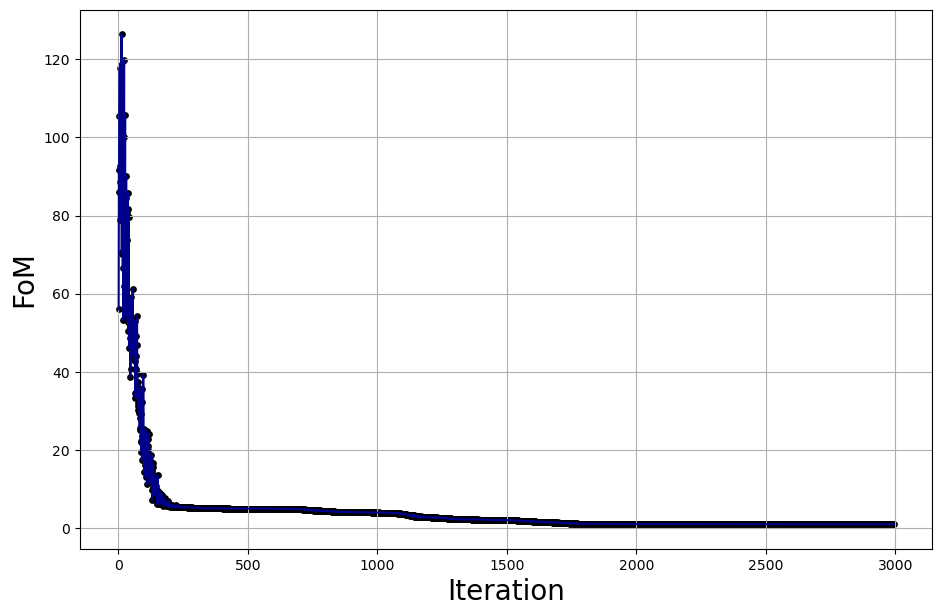

In [12]:
opt_alg_obj = optimization_obj.get_optimization_algorithm()

# FoM vs Iterations
fomlist = opt_alg_obj.FoM_list

# Plot the FoM over the function evaluations
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
num_eval = range(1, len(fomlist)+1)
ax.plot(num_eval, 1 + np.asarray(fomlist), color='darkblue', linewidth=1.5, zorder=10)
ax.scatter(num_eval, 1 + np.asarray(fomlist), color='k', s=15)
plt.grid(True, which="both")
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('FoM', fontsize=20)

In [13]:
# Write down the parameters
controls = opt_alg_obj.get_best_controls()
for index, parameter_value in enumerate(controls["parameters"]):
    print("Parameter Name: {0}, Value: {1}".format(parameters[index]["parameter_name"], parameter_value))

Parameter Name: Parameter0, Value: 1.0000000993967024
Parameter Name: Parameter1, Value: 1.0000002040594245
Parameter Name: Parameter2, Value: 1.000000002195604
Parameter Name: Parameter3, Value: 0.9999998641354729
Parameter Name: Parameter4, Value: 0.9999999192297732
Parameter Name: Parameter5, Value: 0.9999995736908616
Parameter Name: Parameter6, Value: 0.9999996565304222
Parameter Name: Parameter7, Value: 0.9999986051930195
Parameter Name: Parameter8, Value: 0.999996480204445
Parameter Name: Parameter9, Value: 0.9999934032416635


Finally, let's look at the used version of QuOCS

In [14]:
import quocslib
quocslib.__VERSION__

'0.0.47'